In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
%pylab inline

seaborn.set()

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
sys.path.append("..")

import cfg

In [4]:
NOISE_LEVELS = cfg.experiment.noise_levels; NOISE_LEVELS

array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.075, 0.1  , 0.125,
       0.15 , 0.175, 0.2  ])

# IMDB

## CharCNN

In [55]:
results = pd.read_csv('../results/CharCNN_IMDB.csv', index_col=0)

In [9]:
results.sample(10)

,acc_test,f1_test,noise_level_test,model_type,noise_level_train,acc_train,f1_train
54,0.69404,0.705434,0.075,CharCNN,0.02,0.646455,0.656392
76,0.69368,0.682636,0.040,CharCNN,0.03,0.662780,0.666667
0,0.72556,0.725373,-1.000,CharCNN,0.00,0.659981,0.658228
109,0.72008,0.720058,0.010,CharCNN,0.00,0.659981,0.658228
35,0.64532,0.654106,0.200,CharCNN,0.01,0.623601,0.627939
24,0.70428,0.691405,0.000,CharCNN,0.03,0.662780,0.666667
86,0.70972,0.721153,0.020,CharCNN,0.02,0.646455,0.656392
107,0.64496,0.652358,0.200,CharCNN,0.01,0.623601,0.627939
23,0.66804,0.671053,0.200,CharCNN,0.00,0.659981,0.658228
49,0.72040,0.719817,0.010,CharCNN,0.00,0.659981,0.658228


In [57]:
results = pd.read_csv('../results/CharCNN_IMDB.csv', index_col=0)
results_same = results[results['noise_level_test'] > 0]
results_orig = results[results['noise_level_test'] == -1]

plot_x = []
plot_y = []

j = 0
for i, noise_level in enumerate(NOISE_LEVELS):
    plot_data = results_same[(results_same.noise_level_train == noise_level) &\
                             (results_same.noise_level_test == noise_level)]
    if not plot_data.empty:
        plot_x.append(noise_level)
        plot_y.append([])
        for _, res in plot_data.iterrows():
            plot_y[j].append(res['acc_test'])
        j += 1


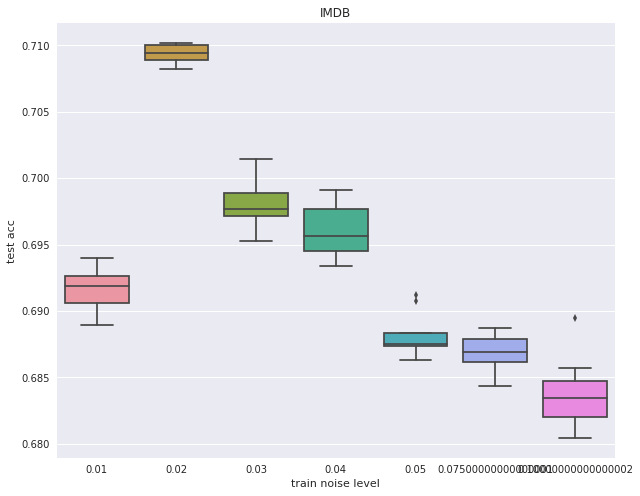

In [58]:
plt.figure(figsize=(10, 8))
plt.title('IMDB')
plt.xlabel('train noise level')
plt.ylabel('test acc')

seaborn.boxplot(plot_x, plot_y)
plt.savefig('IMDB.png')
plt.show()